In [2]:
import pandas as pd
from pathlib import Path
import json
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wilcoxon

# A

========= test size 0.5 ===========
U-statistic: 6.0
P-value: 0.0068359375
The distributions are significantly different.


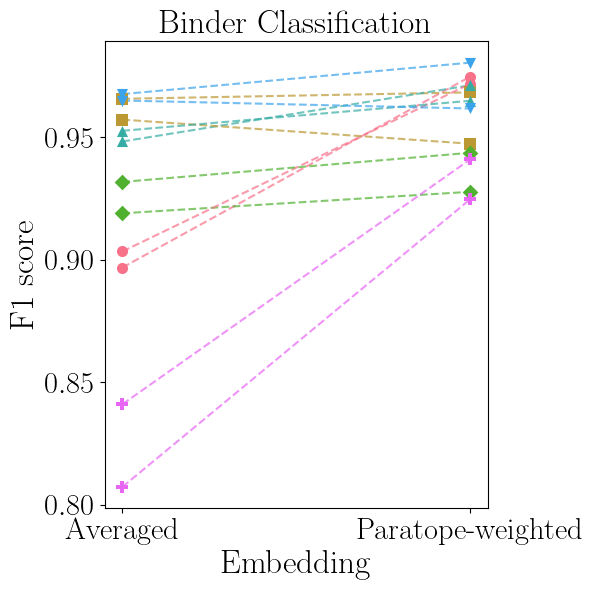

In [3]:
benchmark=Path("/home/athenes/Paraplume/data_with_scripts/sequence_representation/binder_classification/results")

records=[]
for file in benchmark.rglob("*.json"):
    with open(file) as f:
        data=json.load(f)
    data= {k: v for k, v in data.items()}
    data["dataset"]=file.parents[0].stem.split("_")[0]
    records.append(data)

df=pd.DataFrame.from_records(records)

test_sizes = df.query("llm!='all'").groupby(["dataset","llm","sequence_embedding","test_size"])["f1_score"].mean().reset_index()

embedding_labels = {
    "embeddings_classical": "Averaged",
    "embeddings_paratope": "Paratope-weighted"
}
llm_labels = {
    "ablang2": "AbLang2",
    "igT5": "IgT5",
    "igbert": "IgBert",
    "antiberty": "AntiBERTy",
    "esm": "ESM-2",
    "prot-t5": "ProtT5"
}
test_sizes['sequence_embedding_new'] = test_sizes['sequence_embedding'].map(embedding_labels)
test_sizes['llm_new'] = test_sizes['llm'].map(llm_labels)
from scipy.stats import wilcoxon

for test_size in [0.5]:
    paratope_embeds = test_sizes.query("test_size==@test_size and sequence_embedding_new=='Paratope-weighted'")["f1_score"].tolist()
    averaged_embeds = test_sizes.query("test_size==@test_size and sequence_embedding_new=='Averaged'")["f1_score"].tolist()
    print(f"========= test size {test_size} ===========")
    u_statistic, p_value = wilcoxon(paratope_embeds, averaged_embeds, alternative='two-sided')

    print(f"U-statistic: {u_statistic}")
    print(f"P-value: {p_value}")

    alpha = 0.05
    if p_value < alpha:
        print("The distributions are significantly different.")
    else:
        print("The distributions are not significantly different.")

test_sizes["id"]=test_sizes["llm_new"]+" Dataset "+test_sizes["dataset"].apply(lambda x:x[-1])
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.rcParams.update({
    "axes.titlesize": 24,
    "axes.labelsize": 18,
    "xtick.labelsize": 22,
    "ytick.labelsize": 22,
    "legend.fontsize": 24,
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
})

df = test_sizes
df["sequence_embedding_new"] = pd.Categorical(df["sequence_embedding_new"], categories=["Averaged", "Paratope-weighted"], ordered=True)

llms = df["llm_new"].unique()
llm_palette = dict(zip(llms, sns.color_palette("husl", len(llms))))
llm_markers = dict(zip(llms, ["o", "s", "D", "^", "v", "P"]))  # Use different marker styles

# First plot for the data
plt.figure(figsize=(6, 6))
for llm in llms:
    subset = df[df["llm_new"] == llm]
    sns.stripplot(
        x="sequence_embedding_new", y="f1_score", data=subset,
        dodge=False, jitter=False, alpha=1,
        color=llm_palette[llm], marker=llm_markers[llm], size=8
    )

bins = df["id"].unique()
x_positions = {"Averaged": 0, "Paratope-weighted": 1}  # Ensure exact x positions

for bin_value in bins:
    bin_data = df[df["id"] == bin_value]
    for llm in bin_data["llm_new"].unique():
        llm_data = bin_data[bin_data["llm_new"] == llm]
        g_value = llm_data[llm_data["sequence_embedding_new"] == "Averaged"]["f1_score"].values
        s_value = llm_data[llm_data["sequence_embedding_new"] == "Paratope-weighted"]["f1_score"].values

        if len(g_value) > 0 and len(s_value) > 0:
            plt.plot([x_positions["Averaged"], x_positions["Paratope-weighted"]], [g_value[0], s_value[0]],
                    color=llm_palette[llm], linestyle="--", alpha=0.7)
plt.xlabel(r"Embedding", fontsize=24)
plt.ylabel(r"F1 score", fontsize=24)
plt.title(r"Binder Classification")

plt.tight_layout()
plt.savefig("/home/athenes/Paraplume/data_with_scripts/plots/figure6_A.svg", bbox_inches="tight")

# B

========= test size 0.5 ===========
U-statistic: 5.0
P-value: 0.0048828125
The distributions are significantly different.


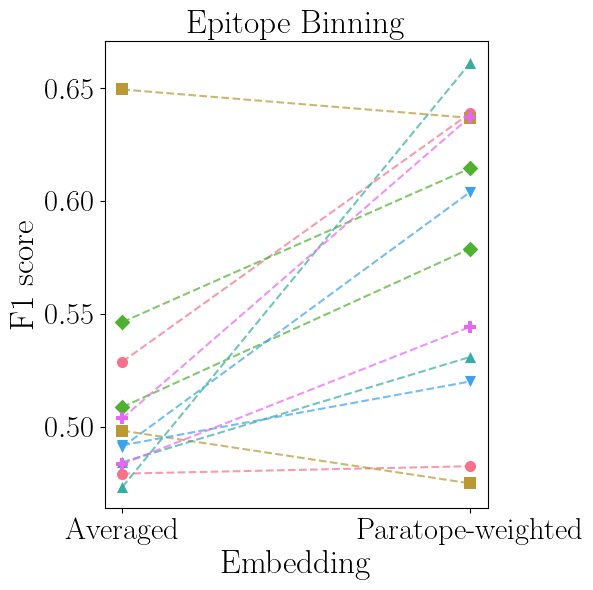

<Figure size 200x600 with 0 Axes>

In [4]:
benchmark=Path("/home/athenes/Paraplume/data_with_scripts/sequence_representation/epitope_binning/results")

records=[]
for file in benchmark.rglob("*.json"):
    with open(file) as f:
        data=json.load(f)
    data= {k: v for k, v in data.items()}
    data["dataset"]=data["data_path"].split("/")[-1]
    records.append(data)

df=pd.DataFrame.from_records(records)

test_sizes = df.query("llm!='all'").groupby(["dataset","llm","sequence_embedding","test_size"])["f1_score"].mean().reset_index()

embedding_labels = {
    "embeddings_classical": "Averaged",
    "embeddings_paratope": "Paratope-weighted"
}
llm_labels = {
    "ablang2": "AbLang2",
    "igT5": "IgT5",
    "igbert": "IgBert",
    "antiberty": "AntiBERTy",
    "esm": "ESM-2",
    "prot-t5": "ProtT5"
}
test_sizes['sequence_embedding_new'] = test_sizes['sequence_embedding'].map(embedding_labels)
test_sizes['llm_new'] = test_sizes['llm'].map(llm_labels)

for test_size in [0.5]:
    paratope_embeds = test_sizes.query("test_size==@test_size and sequence_embedding_new=='Paratope-weighted'")["f1_score"].tolist()
    averaged_embeds = test_sizes.query("test_size==@test_size and sequence_embedding_new=='Averaged'")["f1_score"].tolist()
    print(f"========= test size {test_size} ===========")
    u_statistic, p_value = wilcoxon(paratope_embeds, averaged_embeds, alternative='two-sided')

    print(f"U-statistic: {u_statistic}")
    print(f"P-value: {p_value}")

    alpha = 0.05
    if p_value < alpha:
        print("The distributions are significantly different.")
    else:
        print("The distributions are not significantly different.")

test_sizes["id"]=test_sizes["llm_new"]+" Dataset "+test_sizes["dataset"].apply(lambda x:x.split('_')[-1].strip(".pkl")[-1])
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.rcParams.update({
    "axes.titlesize": 24,
    "axes.labelsize": 18,
    "xtick.labelsize": 22,
    "ytick.labelsize": 22,
    "legend.fontsize": 24,
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
})

df = test_sizes
df["sequence_embedding_new"] = pd.Categorical(df["sequence_embedding_new"], categories=["Averaged", "Paratope-weighted"], ordered=True)

llms = df["llm_new"].unique()
llm_palette = dict(zip(llms, sns.color_palette("husl", len(llms))))
llm_markers = dict(zip(llms, ["o", "s", "D", "^", "v", "P"]))  # Use different marker styles

# First plot for the data
plt.figure(figsize=(6, 6))
for llm in llms:
    subset = df[df["llm_new"] == llm]
    sns.stripplot(
        x="sequence_embedding_new", y="f1_score", data=subset,
        dodge=False, jitter=False, alpha=1,
        color=llm_palette[llm], marker=llm_markers[llm], size=8
    )

bins = df["id"].unique()
x_positions = {"Averaged": 0, "Paratope-weighted": 1}  # Ensure exact x positions

for bin_value in bins:
    bin_data = df[df["id"] == bin_value]
    for llm in bin_data["llm_new"].unique():
        llm_data = bin_data[bin_data["llm_new"] == llm]
        g_value = llm_data[llm_data["sequence_embedding_new"] == "Averaged"]["f1_score"].values
        s_value = llm_data[llm_data["sequence_embedding_new"] == "Paratope-weighted"]["f1_score"].values

        if len(g_value) > 0 and len(s_value) > 0:
            plt.plot([x_positions["Averaged"], x_positions["Paratope-weighted"]], [g_value[0], s_value[0]],
                    color=llm_palette[llm], linestyle="--", alpha=0.7)
plt.xlabel(r"Embedding", fontsize=24)
plt.ylabel(r"F1 score", fontsize=24)
plt.title(r"Epitope Binning")

plt.tight_layout()
plt.savefig("/home/athenes/Paraplume/data_with_scripts/plots/figure6B.svg", bbox_inches="tight")

# Second plot for the legend
fig_legend = plt.figure(figsize=(2, 6))
handles = [plt.Line2D([0], [0], marker=llm_markers[llm], color='w', markerfacecolor=llm_palette[llm], markersize=8, label=llm) for llm in llms]
fig_legend.legend(handles=handles, loc="center", frameon=False)

fig_legend.savefig("/home/athenes/Paraplume/data_with_scripts/plots/figure6_legend.svg", bbox_inches="tight")
